In [1]:
# import pandas as pd

# # 加载 Excel 文件
# excel_path = './beiyou_excel/chaoyang_retrospective_233.xlsx'
# labels_df = pd.read_excel(excel_path)

# # 查看标签数据框架
# print(labels_df.head())

(512, 512)
[[7.5231638e-37 4.1385996e-15 1.3242033e-13 ... 5.0483202e-04
  4.9985462e-04 4.8986345e-04]
 [1.6668661e-14 2.7895402e-13 1.6726687e-12 ... 5.3072587e-04
  5.2554440e-04 5.0992717e-04]
 [5.3339717e-13 2.6542386e-12 8.9265288e-12 ... 5.5767153e-04
  5.4676417e-04 5.3072587e-04]
 ...
 [2.2924140e-03 2.3788379e-03 2.4678512e-03 ... 5.2731574e-02
  5.1903136e-02 5.1085170e-02]
 [2.2756965e-03 2.3616201e-03 2.4319321e-03 ... 5.2103631e-02
  5.1283136e-02 5.0472952e-02]
 [2.2420385e-03 2.3094958e-03 2.3961582e-03 ... 5.1481716e-02
  5.0669048e-02 4.9866676e-02]]


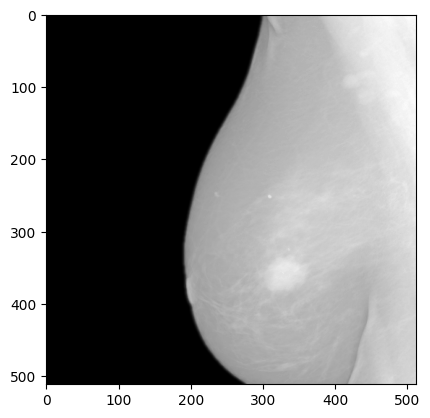

In [29]:
import os
from load_img import load_dcm, load_nii 

# dir = "./data/chaoyang_huigu/BAILIANDI RCC"
dir = "./data/chaoyang_huigu/BAILIANDI RMLO"

img_nib = load_nii(os.path.join(dir, "1.nii.gz"))
print(img_nib.shape)
print(img_nib)
# #查看img_nib中最大值，以及他的位置
# print(np.max(img_nib))
# print(np.where(img_nib == np.max(img_nib)))

# img_dcm = pydicom.dcmread(os.path.join(dir, "ser97311img00002.dcm"))
img_dcm = load_dcm(os.path.join(dir, "ser97311img00001.dcm"))
# print(img_dcm.shape)
# print(img_dcm)

# # 查看 DICOM 图像
import matplotlib.pyplot as plt
plt.imshow(img_dcm, cmap='gray')
plt.savefig("./image/test.png")

# plt.imshow(img_nib, cmap='gray')




In [24]:
import os
import glob

# 获取当前文件夹中的所有.txt文件
txt_files = glob.glob("./image/*.png")

# 删除每个.txt文件
for file in txt_files:
    os.remove(file)
    print(f"{file} 已删除")


./image/57.png 已删除
./image/14.png 已删除
./image/37.png 已删除
./image/269.png 已删除
./image/34.png 已删除
./image/295.png 已删除
./image/17.png 已删除
./image/283.png 已删除
./image/159.png 已删除
./image/284.png 已删除
./image/31.png 已删除
./image/173.png 已删除
./image/35.png 已删除
./image/281.png 已删除
./image/268.png 已删除
./image/264.png 已删除
./image/54.png 已删除
./image/119.png 已删除
./image/49.png 已删除
./image/90.png 已删除
./image/152.png 已删除
./image/151.png 已删除
./image/39.png 已删除
./image/214.png 已删除
./image/196.png 已删除
./image/72.png 已删除
./image/162.png 已删除
./image/204.png 已删除
./image/165.png 已删除
./image/140.png 已删除
./image/99.png 已删除
./image/181.png 已删除
./image/169.png 已删除
./image/178.png 已删除
./image/156.png 已删除
./image/150.png 已删除
./image/118.png 已删除
./image/186.png 已删除
./image/188.png 已删除
./image/189.png 已删除
./image/61.png 已删除
./image/154.png 已删除
./image/5.png 已删除
./image/104.png 已删除
./image/144.png 已删除
./image/240.png 已删除
./image/213.png 已删除
./image/245.png 已删除
./image/290.png 已删除
./image/48.png 已删除
./image/219.png 已

In [ ]:
import pandas as pd
import os
from load_img import load_dcm, load_nii
import numpy as np
from process_data import process_images_for_patients
from PIL import Image

def process_images_for_patients(base_path, target_size=(512, 512),a =0):

    # 获取所有病人文件夹
    all_folders = sorted([f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))])

    # 按病人分组文件夹，每两个文件夹为一个病人
    patient_folders = []
    for i in range(0, len(all_folders), 2):
        
        if i + 1 < len(all_folders):
            patient_folders.append([all_folders[i], all_folders[i + 1]])

    # print(len(patient_folders))

    # for _, row in labels_df.iterrows():
    #     label = row['N分期']  # 获取病人标签（N分期）
        
    # 加载每个文件夹中的图像
    patient_images = []

    for folder_pair in patient_folders:

        all_images = []
        for folder in folder_pair:
            a += 1

            dcm_file = None
            nii_file = None

            # print(folder)

            # 查找对应的 .dcm 和 .nii 文件
            for file in os.listdir(os.path.join(base_path, folder)):
                if file.endswith('.dcm'):
                    dcm_file = os.path.join(base_path, folder, file)
                elif file.endswith('.nii.gz'):
                    nii_file = os.path.join(base_path, folder, file)
                           
            # print(f"dcm_file: {dcm_file}, nii_file: {nii_file}")

            if dcm_file and nii_file:
                # 读取并处理 .dcm 和 .nii 图像
                dcm_image = load_dcm(dcm_file, target_size)
                nii_mask = load_nii(nii_file, target_size)

                # 将两个图像相乘
                focused_dcm_image = dcm_image * nii_mask
                
                # npimage = np.array(focused_dcm_image)
                # np.savetxt(npimage,f'./txt/{a}.txt')
                # print(npimage)
                # np.savetxt(f"./txt/{a}.txt", npimage, fmt="%.1f", delimiter=",")

                # save_image(npimage,f"./image/{a}.png")
                # plt.imshow(focused_dcm_image, cmap='gray')
                # plt.savefig(f"./image/{a}.png")
                

                all_images.append(focused_dcm_image)

            else:
                all_images.append(load_dcm(dcm_file, target_size))
                        
        if len(all_images) == 2:  # 确保每个病人有 2 张图像

            # print(all_images[0].shape)
            # 将两个图像堆叠在一起
            patient_input = np.stack(all_images, axis=0)  # 形状为 (2, 512, 512)
            # 追加至列表中
            patient_images.append(patient_input)

        else:
            print(f"Skipping patient {folder_pair} due to missing images")

    return patient_images

def save_image(image_array, save_path):
    """
    将灰度图像数组保存为图像文件
    :param image_array: 灰度图像数组 (二维数组)
    :param save_path: 保存路径
    """
    # 确保数组是灰度图像（二维数组）
    if len(image_array.shape) == 2:
        # 将 NumPy 数组转换为 PIL 图像
        img = Image.fromarray(image_array.astype(np.uint8))  # uint8 类型
        img.save(save_path)
    else:
        print(len(image_array.shape))
    

base_path = './data/chaoyang_huigu'  # 图像数据的根目录
save_path = './image'
target_size = (512, 512)  # 目标图像尺寸

patient_images = process_images_for_patients(base_path, target_size)


In [31]:
# 加载标签数据

excel_path = './data/beiyou_excel/chaoyang_retrospective_233.xlsx'  # 包含病人姓名和标签的Excel文件路径
labels_df = pd.read_excel(excel_path)

# 补全标签并构建 images_with_labels 列表
images_with_labels = []
labels = []
for i, patient_input in enumerate(patient_images):
    label = labels_df.iloc[i]['N分期']  # 按顺序获取对应的标签

    # 如果标签为 NaN，则用均值填充
    if pd.isna(label):
        label = 1.0

    elif label == 2.0 or label == 3.0 :
        label = 1.0
    

    images_with_labels.append((patient_input, label))
    labels.append(label)

# 输出处理后的标签
for i, (_, label) in enumerate(images_with_labels):
    print(f"第 {i+1} 项标签: {label}")
print(labels)

第 1 项标签: 1.0
第 2 项标签: 0.0
第 3 项标签: 1.0
第 4 项标签: 0.0
第 5 项标签: 0.0
第 6 项标签: 1.0
第 7 项标签: 0.0
第 8 项标签: 1.0
第 9 项标签: 0.0
第 10 项标签: 1.0
第 11 项标签: 1.0
第 12 项标签: 1.0
第 13 项标签: 0.0
第 14 项标签: 1.0
第 15 项标签: 0.0
第 16 项标签: 0.0
第 17 项标签: 0.0
第 18 项标签: 1.0
第 19 项标签: 0.0
第 20 项标签: 1.0
第 21 项标签: 0.0
第 22 项标签: 0.0
第 23 项标签: 1.0
第 24 项标签: 1.0
第 25 项标签: 0.0
第 26 项标签: 1.0
第 27 项标签: 0.0
第 28 项标签: 0.0
第 29 项标签: 1.0
第 30 项标签: 1.0
第 31 项标签: 0.0
第 32 项标签: 0.0
第 33 项标签: 0.0
第 34 项标签: 1.0
第 35 项标签: 1.0
第 36 项标签: 0.0
第 37 项标签: 1.0
第 38 项标签: 1.0
第 39 项标签: 1.0
第 40 项标签: 0.0
第 41 项标签: 1.0
第 42 项标签: 0.0
第 43 项标签: 1.0
第 44 项标签: 0.0
第 45 项标签: 1.0
第 46 项标签: 1.0
第 47 项标签: 1.0
第 48 项标签: 0.0
第 49 项标签: 1.0
第 50 项标签: 1.0
第 51 项标签: 0.0
第 52 项标签: 0.0
第 53 项标签: 1.0
第 54 项标签: 0.0
第 55 项标签: 1.0
第 56 项标签: 1.0
第 57 项标签: 0.0
第 58 项标签: 1.0
第 59 项标签: 1.0
第 60 项标签: 0.0
第 61 项标签: 0.0
第 62 项标签: 0.0
第 63 项标签: 0.0
第 64 项标签: 0.0
第 65 项标签: 1.0
第 66 项标签: 0.0
第 67 项标签: 0.0
第 68 项标签: 1.0
第 69 项标签: 1.0
第 70 项标签: 1.0
第 71 项标签: 0.0
第 72 项标签: 1.0
第

In [38]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torchvision import transforms

from dataset import ImageDataset

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    # transforms.RandomVerticalFlip(),    # 随机垂直翻转
    transforms.RandomRotation(20),      # 随机旋转 
    transforms.RandomResizedCrop(512, scale=(0.8, 1.0)),  # 随机裁剪并调整到 512x512
    transforms.Normalize([0.5], [0.5]),  # 归一化到 [-1, 1]
])

# 验证集保持原始数据
val_transform = transforms.Compose([
    transforms.Normalize([0.5], [0.5]),  # 与训练集一致的归一化
])


# 创建数据集实例
full_dataset = ImageDataset(images_with_labels)

# 使用 random_split 分割数据集
train_size = int(0.8 * len(full_dataset))  # 80% 训练集
val_size = len(full_dataset) - train_size  # 20% 验证集
train_subset, val_subset = random_split(full_dataset, [train_size, val_size])

# 为分割后的子集添加数据增强
train_subset.dataset.transform = train_transform
val_subset.dataset.transform = val_transform

# 创建 DataLoader
train_loader = DataLoader(train_subset, batch_size=2, shuffle=True, num_workers=0)
val_loader = DataLoader(val_subset, batch_size=2, shuffle=False, num_workers=0)

## 检查训练集的第一个批次
for inputs, labels in train_loader:
    print(f"输入张量形状: {inputs}")
    print(f"标签张量形状: {labels}")
    break

输入张量形状: tensor([[[[-0.9999, -0.9999, -0.9999,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9999, -0.9999, -0.9999,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9999, -0.9999, -0.9999,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.9908, -0.9906, -0.9905,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9910, -0.9908, -0.9907,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9913, -0.9913, -0.9912,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9999, -0.9999, -0.9999,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9999, -0.9999, -0.9999,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9999, -0.9999, -0.9999,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.8615, -0.8577, -0.8562,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8651, -0.8606, -0.8586,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8674, -0.8646, -0.8612,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-0.9998, -0.9998, -0.9998,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9998, 

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# 训练函数
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()  # 设置模型为训练模式
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # 将数据移动到 GPU 或 CPU
        inputs, labels = inputs.to(device), labels.to(device)

        # with open("debug_log.txt", "a") as f:
        #     f.write(f"Inputs shape: {inputs.shape}\n")
        #     f.write(f"Labels shape: {labels.shape}\n")
        #     f.write(f"Inputs values: {inputs}\n")
        #     f.write(f"Labels values: {labels}\n")

        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播与优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 记录损失
        running_loss += loss.item()

        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

# 验证函数
def validate_one_epoch(model, val_loader, criterion, device):
    model.eval()  # 设置模型为评估模式
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            # 将数据移动到 GPU 或 CPU
            inputs, labels = inputs.to(device), labels.to(device)

            # 前向传播
            outputs = model(inputs)

            # print(f"模型输出: {outputs}")

            loss = criterion(outputs, labels)

            # 记录损失
            running_loss += loss.item()

            # 计算准确率
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc


In [40]:
# 超参数设置
from model import Resnet18_cbam
model = Resnet18_cbam(num_classes=4)  
num_epochs = 100
learning_rate = 0.0001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"使用设备：{device}")

# class_counts = [sum(label == i for label in labels) for i in range(2)]  # 每个类别的样本数量
# class_weights = [1.0 / count for count in class_counts]  # 权重为样本数量的倒数
# print(f"每个类别的样本数量：{class_counts}")
# class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)


# 模型、损失函数和优化器
model = model.to(device)  # 将模型移动到 GPU 或 CPU
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-5)  # Adam 优化器

# 存储训练和验证的结果
history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

# 开始训练
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # 训练一个 epoch
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)

    # 在验证集上评估
    val_loss, val_acc = validate_one_epoch(model, val_loader, criterion, device)
    

    # 打印结果
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


    # 保存log
    with open("log.txt", "a") as f:
        f.write(f"Epoch {epoch + 1}/{num_epochs}\n")
        f.write(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}\n")
        f.write(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}\n")

    # 保存验证集上准确率最高的模型
    if epoch == 0 or val_acc > 0.6:
        torch.save(model.state_dict(), f"./model_save/epoch{epoch + 1}_model.pth")
        print(f"Model saved at {epoch + 1}-th epoch")

    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    print(max(history["val_acc"]))


使用设备：cuda
Epoch 1/100
Train Loss: 0.8554, Train Acc: 0.5215
Val Loss: 0.7853, Val Acc: 0.5106
Model saved at 1-th epoch
0.5106382978723404
Epoch 2/100
Train Loss: 0.7049, Train Acc: 0.5645
Val Loss: 0.7287, Val Acc: 0.6383
Model saved at 2-th epoch
0.6382978723404256
Epoch 3/100
Train Loss: 0.7211, Train Acc: 0.6075
Val Loss: 0.7207, Val Acc: 0.5106
0.6382978723404256
Epoch 4/100
Train Loss: 0.6783, Train Acc: 0.5645
Val Loss: 0.7218, Val Acc: 0.4681
0.6382978723404256
Epoch 5/100
Train Loss: 0.6746, Train Acc: 0.6237
Val Loss: 0.7335, Val Acc: 0.5957
0.6382978723404256
Epoch 6/100
Train Loss: 0.6951, Train Acc: 0.5753
Val Loss: 0.6760, Val Acc: 0.6383
Model saved at 6-th epoch
0.6382978723404256
Epoch 7/100
Train Loss: 0.6594, Train Acc: 0.6022
Val Loss: 0.6834, Val Acc: 0.5745
0.6382978723404256
Epoch 8/100
Train Loss: 0.6618, Train Acc: 0.6290
Val Loss: 0.6817, Val Acc: 0.5957
0.6382978723404256
Epoch 9/100
Train Loss: 0.6533, Train Acc: 0.6075
Val Loss: 0.6895, Val Acc: 0.5319
0.63

KeyboardInterrupt: 

N分期（四分类）分类器,初步结果：

数据预处理：将nii图像做距离变换，呈现聚焦效果，后与dcm图像做点乘
输入：两张dcm图像组成的双通道，shape:(2,512,512)
模型：Resnet18 + 注意力模块

训练集+验证集：朝阳回顾_233
验证集最大准确率：62%

测试集：朝阳前瞻_190
测试集最大准确率：52%
AUC最大值：0.57
